In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
import tensorflow as tf
import numpy as np
from nltk.stem import PorterStemmer

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!unzip gdrive/"My Drive"/train.zip

Archive:  gdrive/My Drive/train.zip
  inflating: train.csv               


In [4]:
data=pd.read_csv("train.csv")

In [5]:
data.shape

(20800, 5)

In [6]:
data= data.dropna()

In [7]:
data.shape

(18285, 5)

In [8]:
data.reset_index(inplace=True)

In [9]:
data=data.iloc[:,2:]

In [10]:
data.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [11]:
## Get the Independent Features

X=data.loc[:,["title"]]

In [12]:
## Get the Dependent features
y=data['label']

In [13]:
X.shape

(18285, 1)

In [14]:
y.shape

(18285,)

In [15]:
#lowering the text
data["title"]=data["title"].apply(lambda x: x.lower())

In [16]:
#cleaning the text
data["title"]=data.title.str.replace('[^a-zA-Z ]', '')

In [17]:
#Stemming
ps = PorterStemmer()
data['title'] = data['title'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [18]:
corpus = []
for i in range(0, len(data["title"])):
  corpus.append(data["title"][i])

In [19]:
corpus

['hous dem aid we didnt even see comey letter until jason chaffetz tweet it',
 'flynn hillari clinton big woman on campu breitbart',
 'whi the truth might get you fire',
 'civilian kill in singl us airstrik have been identifi',
 'iranian woman jail for fiction unpublish stori about woman stone to death for adulteri',
 'jacki mason hollywood would love trump if he bomb north korea over lack of tran bathroom exclus video breitbart',
 'benot hamon win french socialist parti presidenti nomin the new york time',
 'a backchannel plan for ukrain and russia courtesi of trump associ the new york time',
 'obama organ for action partner with soroslink indivis to disrupt trump agenda',
 'bbc comedi sketch real housew of isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter in the arctic photo',
 'us offici see no link between trump and russia',
 're ye there are paid govern troll on social media blog forum and websit',
 'in major leagu soccer argentin find a home and

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data["title"], data['label'],test_size = 0.05, random_state = 98)

In [22]:
pip install gensim

In [23]:
from gensim.models import Word2Vec

Embedding_dimensions = 200
type(X_train)
#Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [24]:
Word2vec_train_data

[['presidentelect',
  'trump',
  'invit',
  'an',
  'excit',
  'isra',
  'prime',
  'minist',
  'benjamin',
  'netanyahu',
  'to',
  'come',
  'visit'],
 ['a',
  'rare',
  'pacif',
  'island',
  'captiv',
  'it',
  'neighborhood',
  'the',
  'new',
  'york',
  'time'],
 ['on',
  'dr',
  'oz',
  'trump',
  'offer',
  'placebo',
  'transpar',
  'the',
  'new',
  'york',
  'time'],
 ['obama',
  'say',
  'he',
  'would',
  'have',
  'defeat',
  'trump',
  'for',
  'a',
  'third',
  'term',
  'the',
  'new',
  'york',
  'time'],
 ['senat',
  'confirm',
  'scott',
  'pruitt',
  'to',
  'lead',
  'trump',
  'epa',
  'despit',
  'dem',
  'delay',
  'tactic',
  'breitbart'],
 ['chaiwali',
  'an',
  'indian',
  'restaur',
  'that',
  'feel',
  'like',
  'home',
  'the',
  'new',
  'york',
  'time'],
 ['we',
  'need',
  'a',
  'miracl',
  'on',
  'th',
  'street',
  'the',
  'new',
  'york',
  'time'],
 ['bill',
  'cunningham',
  'look',
  'for',
  'subject',
  'and',
  'they',
  'look',
  'for',

In [25]:
word2vec_model = Word2Vec(Word2vec_train_data,
                 size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.vocab))

Vocabulary Length: 4154


In [26]:
input_length = 200
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(corpus)

vocab_length = len(tokenizer.word_index) + 1
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 15241


In [28]:
 len(tokenizer.word_index)

15240

In [29]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)

X_train.shape: (17370, 200)
X_test.shape : (915, 200)


In [30]:
from gensim.models import KeyedVectors

In [31]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))
for word, token in tokenizer.word_index.items():
  if word2vec_model.wv.__contains__(word):
      embedding_matrix[token] = word2vec_model.wv.__getitem__(word)
print("Embedding Matrix Shape:", embedding_matrix.shape)     


Embedding Matrix Shape: (15241, 200)


In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding , SimpleRNN

In [33]:
embedding_layer = Embedding(input_dim = vocab_length, 
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix], 
                                input_length=input_length,
                                trainable=False)
modela = Sequential()
modela.add(embedding_layer)
modela.add(Bidirectional(LSTM(256)))
modela.add(Dense(1, activation='sigmoid'))
modela.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

In [34]:
modela.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 200)          3048200   
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               935936    
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 3,984,649
Trainable params: 936,449
Non-trainable params: 3,048,200
_________________________________________________________________


In [35]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [36]:
a = modela.fit(X_train, y_train, batch_size=128, epochs=10,verbose=1, validation_split=0.2,callbacks=callbacks)

Epoch 1/10
109/109 [==============================] - 28s 185ms/step - loss: 0.3999 - accuracy: 0.7995 - val_loss: 0.3259 - val_accuracy: 0.8400
Epoch 2/10
109/109 [==============================] - 19s 174ms/step - loss: 0.3050 - accuracy: 0.8687 - val_loss: 0.2569 - val_accuracy: 0.8923
Epoch 3/10
109/109 [==============================] - 19s 175ms/step - loss: 0.2641 - accuracy: 0.8849 - val_loss: 0.2401 - val_accuracy: 0.8915
Epoch 4/10
109/109 [==============================] - 19s 175ms/step - loss: 0.2489 - accuracy: 0.8875 - val_loss: 0.2265 - val_accuracy: 0.8969
Epoch 5/10
109/109 [==============================] - 19s 175ms/step - loss: 0.2389 - accuracy: 0.8913 - val_loss: 0.2245 - val_accuracy: 0.8984
Epoch 6/10
109/109 [==============================] - 19s 176ms/step - loss: 0.2320 - accuracy: 0.8922 - val_loss: 0.2172 - val_accuracy: 0.8967
Epoch 7/10
109/109 [==============================] - 19s 175ms/step - loss: 0.2290 - accuracy: 0.8947 - val_loss: 0.2130 - val_ac

In [37]:
pred=(modela.predict(X_test) > 0.5).astype("int32")

In [38]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
acc

0.8852459016393442

In [39]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,pred)
con

array([[468,  48],
       [ 57, 342]])

In [40]:
a.history

{'accuracy': [0.799510657787323,
  0.8687391877174377,
  0.8848589658737183,
  0.8875215649604797,
  0.8912636637687683,
  0.8921992182731628,
  0.8947179317474365,
  0.8947179317474365,
  0.8971646428108215,
  0.8999711871147156],
 'loss': [0.39988553524017334,
  0.30498751997947693,
  0.26406705379486084,
  0.24886438250541687,
  0.23891307413578033,
  0.2320157140493393,
  0.2290380299091339,
  0.22608710825443268,
  0.2209029495716095,
  0.21611294150352478],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'val_accuracy': [0.8399539589881897,
  0.8923431038856506,
  0.8914795517921448,
  0.8969487547874451,
  0.8983880281448364,
  0.8966609239578247,
  0.8981001973152161,
  0.9004030227661133,
  0.9029936790466309,
  0.8848589658737183],
 'val_loss': [0.3258841037750244,
  0.256900817155838,
  0.24013863503932953,
  0.2264510840177536,
  0.22447456419467926,
  0.2171681821346283,
  0.21304380893707275,
  0.213052898645401,
  0.20848427712917328,
  0.

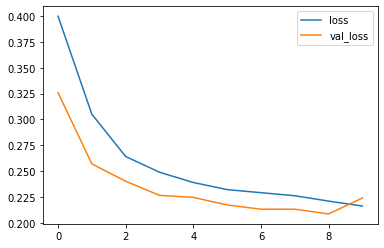

In [41]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(a.history['loss'], label='loss')
plt.plot(a.history['val_loss'], label = 'val_loss')
plt.legend()


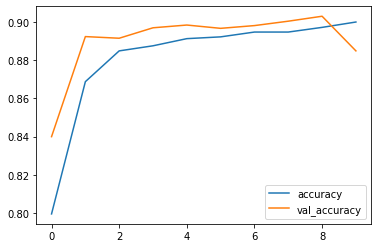

In [42]:
# plotting the accuracy and validation accuracy of the model
plt.plot(a.history['accuracy'], label= 'accuracy')
plt.plot(a.history['val_accuracy'], label='val_accuracy')
plt.legend()


In [43]:
from sklearn.metrics import classification_report
print(print(classification_report(y_test,pred,target_names=['real','fake'])))

              precision    recall  f1-score   support

        real       0.89      0.91      0.90       516
        fake       0.88      0.86      0.87       399

    accuracy                           0.89       915
   macro avg       0.88      0.88      0.88       915
weighted avg       0.89      0.89      0.89       915

None


In [44]:
embedding_layer = Embedding(input_dim = vocab_length, 
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix], 
                                input_length=input_length,
                                trainable=False)
modelb = Sequential()
modelb.add(embedding_layer)
modelb.add(SimpleRNN(128))
modelb.add(Dense(1, activation='sigmoid'))
modelb.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
modelb.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 200)          3048200   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               42112     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,090,441
Trainable params: 42,241
Non-trainable params: 3,048,200
_________________________________________________________________


In [45]:
b= modelb.fit(X_train, y_train, batch_size=64, epochs=10,callbacks=callbacks,verbose=1, validation_split=0.2)

Epoch 1/10
218/218 [==============================] - 57s 255ms/step - loss: 0.3727 - accuracy: 0.8245 - val_loss: 0.3137 - val_accuracy: 0.8969
Epoch 2/10
218/218 [==============================] - 56s 255ms/step - loss: 0.2986 - accuracy: 0.8825 - val_loss: 0.2705 - val_accuracy: 0.8794
Epoch 3/10
218/218 [==============================] - 56s 258ms/step - loss: 0.2757 - accuracy: 0.8860 - val_loss: 0.2656 - val_accuracy: 0.8791
Epoch 4/10
218/218 [==============================] - 56s 256ms/step - loss: 0.2554 - accuracy: 0.8882 - val_loss: 0.2447 - val_accuracy: 0.8872
Epoch 5/10
218/218 [==============================] - 58s 265ms/step - loss: 0.2495 - accuracy: 0.8916 - val_loss: 0.2408 - val_accuracy: 0.8912
Epoch 6/10
218/218 [==============================] - 56s 257ms/step - loss: 0.2520 - accuracy: 0.8912 - val_loss: 0.2538 - val_accuracy: 0.9010
Epoch 7/10
218/218 [==============================] - 56s 256ms/step - loss: 0.2712 - accuracy: 0.8873 - val_loss: 0.2555 - val_ac

In [46]:
pred=(modelb.predict(X_test) > 0.5).astype("int32")

In [47]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
acc

0.8863387978142077

In [48]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,pred)
con

array([[425,  91],
       [ 13, 386]])

In [49]:
b.history

{'accuracy': [0.8244818449020386,
  0.8824841976165771,
  0.8860103487968445,
  0.8882412314414978,
  0.8916234970092773,
  0.8911917209625244,
  0.8873056769371033,
  0.8921272158622742,
  0.889824390411377,
  0.8926309943199158],
 'loss': [0.37266913056373596,
  0.29857006669044495,
  0.2756744921207428,
  0.2553735673427582,
  0.24950210750102997,
  0.25204405188560486,
  0.2711803615093231,
  0.25724488496780396,
  0.26470866799354553,
  0.24685363471508026],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'val_accuracy': [0.8969487547874451,
  0.879389762878418,
  0.8791018724441528,
  0.8871617913246155,
  0.8911917209625244,
  0.900978684425354,
  0.8989637494087219,
  0.9024179577827454,
  0.8969487547874451,
  0.8998273015022278],
 'val_loss': [0.31365013122558594,
  0.27054959535598755,
  0.26563122868537903,
  0.2446632832288742,
  0.2407667189836502,
  0.25375896692276,
  0.2554771602153778,
  0.2457919418811798,
  0.23666773736476898,
  0.23

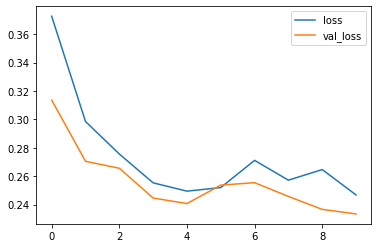

In [50]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(b.history['loss'], label='loss')
plt.plot(b.history['val_loss'], label = 'val_loss')
plt.legend()

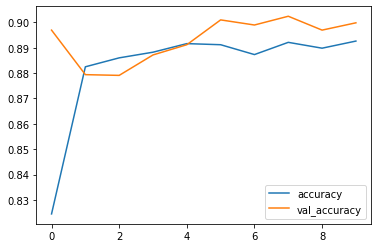

In [51]:
# plotting the accuracy and validation accuracy of the model
plt.plot(b.history['accuracy'], label= 'accuracy')
plt.plot(b.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [52]:
(print(classification_report(y_test,pred,target_names=['real','fake'])))

              precision    recall  f1-score   support

        real       0.97      0.82      0.89       516
        fake       0.81      0.97      0.88       399

    accuracy                           0.89       915
   macro avg       0.89      0.90      0.89       915
weighted avg       0.90      0.89      0.89       915



In [53]:
embedding_layer = Embedding(input_dim = vocab_length, 
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix], 
                                input_length=input_length,
                                trainable=False)
modelc = Sequential()
modelc.add(embedding_layer)
modelc.add(LSTM(128))
modelc.add(Dense(1, activation='sigmoid'))
modelc.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
modelc.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 200)          3048200   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               168448    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,216,777
Trainable params: 168,577
Non-trainable params: 3,048,200
_________________________________________________________________


In [54]:
c= modelc.fit(X_train, y_train, batch_size=64, epochs=10,callbacks=callbacks,verbose=1, validation_split=0.2)

Epoch 1/10
218/218 [==============================] - 12s 44ms/step - loss: 0.3751 - accuracy: 0.8215 - val_loss: 0.2977 - val_accuracy: 0.8837
Epoch 2/10
218/218 [==============================] - 9s 42ms/step - loss: 0.2762 - accuracy: 0.8808 - val_loss: 0.2769 - val_accuracy: 0.8469
Epoch 3/10
218/218 [==============================] - 9s 41ms/step - loss: 0.2549 - accuracy: 0.8863 - val_loss: 0.2421 - val_accuracy: 0.9021
Epoch 4/10
218/218 [==============================] - 9s 41ms/step - loss: 0.2458 - accuracy: 0.8897 - val_loss: 0.2233 - val_accuracy: 0.8998
Epoch 5/10
218/218 [==============================] - 9s 42ms/step - loss: 0.2394 - accuracy: 0.8903 - val_loss: 0.2200 - val_accuracy: 0.8987
Epoch 6/10
218/218 [==============================] - 9s 42ms/step - loss: 0.2300 - accuracy: 0.8926 - val_loss: 0.2153 - val_accuracy: 0.9007
Epoch 7/10
218/218 [==============================] - 9s 42ms/step - loss: 0.2261 - accuracy: 0.8975 - val_loss: 0.2308 - val_accuracy: 0.890

In [55]:
pred=(modelc.predict(X_test) > 0.5).astype("int32")

In [56]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
acc

0.8907103825136612

In [57]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,pred)
con

array([[461,  55],
       [ 45, 354]])

In [58]:
c.history

{'accuracy': [0.8214594125747681,
  0.8808290362358093,
  0.8862982392311096,
  0.8896805047988892,
  0.8902561664581299,
  0.8925589919090271,
  0.8975244760513306,
  0.8958693146705627],
 'loss': [0.37505149841308594,
  0.27617838978767395,
  0.2549359202384949,
  0.24580395221710205,
  0.2393866926431656,
  0.23003610968589783,
  0.2260889708995819,
  0.2258378565311432],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'val_accuracy': [0.8837075233459473,
  0.8468624353408813,
  0.902130126953125,
  0.8998273015022278,
  0.8986758589744568,
  0.9006908535957336,
  0.8909038305282593,
  0.8920552730560303],
 'val_loss': [0.29766809940338135,
  0.2768792510032654,
  0.24208280444145203,
  0.22326257824897766,
  0.21997445821762085,
  0.21525520086288452,
  0.2307647317647934,
  0.21917398273944855]}

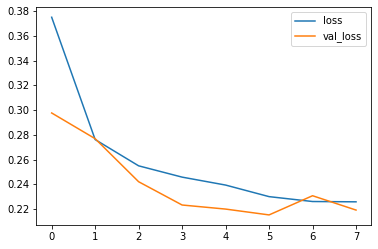

In [59]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(c.history['loss'], label='loss')
plt.plot(c.history['val_loss'], label = 'val_loss')
plt.legend()

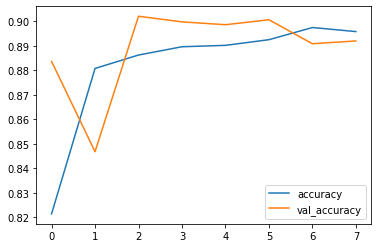

In [60]:
# plotting the accuracy and validation accuracy of the model
plt.plot(c.history['accuracy'], label= 'accuracy')
plt.plot(c.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [61]:
print(print(classification_report(y_test,pred,target_names=['real','fake'])))

              precision    recall  f1-score   support

        real       0.91      0.89      0.90       516
        fake       0.87      0.89      0.88       399

    accuracy                           0.89       915
   macro avg       0.89      0.89      0.89       915
weighted avg       0.89      0.89      0.89       915

None


In [62]:
embedding_layer = Embedding(input_dim = vocab_length, 
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix], 
                                input_length=input_length,
                                trainable=False)
modeld = Sequential()
modeld.add(embedding_layer)
modeld.add(LSTM(128,return_sequences=True))
modeld.add(LSTM(64,return_sequences=True))
modeld.add(LSTM(32))
modeld.add(Dense(1, activation='sigmoid'))
modeld.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
modeld.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 200)          3048200   
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 128)          168448    
_________________________________________________________________
lstm_3 (LSTM)                (None, 200, 64)           49408     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,278,505
Trainable params: 230,305
Non-trainable params: 3,048,200
_________________________________________________________________


In [63]:
d = modeld.fit(X_train, y_train, batch_size=64, epochs=10,callbacks=callbacks,verbose=1, validation_split=0.2)

Epoch 1/10
218/218 [==============================] - 38s 156ms/step - loss: 0.4266 - accuracy: 0.7537 - val_loss: 0.3625 - val_accuracy: 0.7752
Epoch 2/10
218/218 [==============================] - 32s 145ms/step - loss: 0.3329 - accuracy: 0.8340 - val_loss: 0.2964 - val_accuracy: 0.8728
Epoch 3/10
218/218 [==============================] - 31s 140ms/step - loss: 0.2508 - accuracy: 0.8883 - val_loss: 0.2201 - val_accuracy: 0.9007
Epoch 4/10
218/218 [==============================] - 30s 139ms/step - loss: 0.2306 - accuracy: 0.8990 - val_loss: 0.2153 - val_accuracy: 0.9030
Epoch 5/10
218/218 [==============================] - 29s 135ms/step - loss: 0.2248 - accuracy: 0.8985 - val_loss: 0.2028 - val_accuracy: 0.9030
Epoch 6/10
218/218 [==============================] - 29s 134ms/step - loss: 0.2159 - accuracy: 0.9005 - val_loss: 0.2010 - val_accuracy: 0.9041
Epoch 7/10
218/218 [==============================] - 31s 144ms/step - loss: 0.2216 - accuracy: 0.8993 - val_loss: 0.1981 - val_ac

In [64]:
pred=(modeld.predict(X_test) > 0.5).astype("int32")

In [65]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
acc

0.9136612021857924

In [66]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,pred)
con

array([[446,  70],
       [  9, 390]])

In [67]:
d.history

{'accuracy': [0.7536700963973999,
  0.8339809775352478,
  0.8883131742477417,
  0.8989637494087219,
  0.8984599709510803,
  0.9004749655723572,
  0.8992515802383423,
  0.9024179577827454,
  0.9004030227661133,
  0.9031375646591187],
 'loss': [0.4266223907470703,
  0.33286312222480774,
  0.25079646706581116,
  0.23060691356658936,
  0.2248343974351883,
  0.21585197746753693,
  0.22162318229675293,
  0.21187971532344818,
  0.21191583573818207,
  0.20772108435630798],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'val_accuracy': [0.775187075138092,
  0.8727691173553467,
  0.9006908535957336,
  0.9029936790466309,
  0.9029936790466309,
  0.9041450619697571,
  0.9061600565910339,
  0.9058721661567688,
  0.9047207832336426,
  0.9104778170585632],
 'val_loss': [0.3624975383281708,
  0.29642441868782043,
  0.22012966871261597,
  0.2152889221906662,
  0.20275399088859558,
  0.2009548544883728,
  0.19807183742523193,
  0.19731387495994568,
  0.19892805814743042,

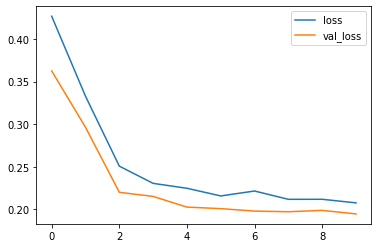

In [68]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(d.history['loss'], label='loss')
plt.plot(d.history['val_loss'], label = 'val_loss')
plt.legend()

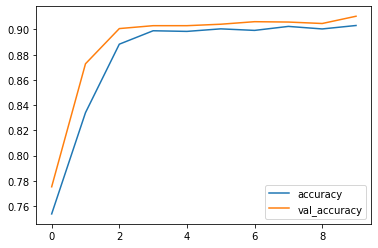

In [69]:
# plotting the accuracy and validation accuracy of the model
plt.plot(d.history['accuracy'], label= 'accuracy')
plt.plot(d.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [70]:
print(print(classification_report(y_test,pred,target_names=['real','fake'])))

              precision    recall  f1-score   support

        real       0.98      0.86      0.92       516
        fake       0.85      0.98      0.91       399

    accuracy                           0.91       915
   macro avg       0.91      0.92      0.91       915
weighted avg       0.92      0.91      0.91       915

None
